In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import csv
from datetime import datetime

In [2]:
dataframe = pd.read_csv('mobile_report.csv')

# Convert 'Score' column from string to float for specific IDs, then multiply by 100 and convert to int
# dataframe.loc[dataframe['ID'].isin(['performance', 'accessibility', 'best-practices', 'seo']), 'Score'] = \
#     (pd.to_numeric(dataframe.loc[dataframe['ID'].isin(['performance', 'accessibility', 'best-practices', 'seo']), 'Score']) * 100).astype(int)

# print(dataframe)

dataframe.head(13)

,Month,performance,accessibility,best-practices,seo,first-contentful-paint,largest-contentful-paint,total-blocking-time,cumulative-layout-shift,speed-index
0,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,March,68.0,92.0,56.0,82.0,2.0,5.1,270.0,0.027,6.5
3,April,73.0,92.0,78.0,82.0,2.0,4.0,290.0,0.041,7.0
4,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


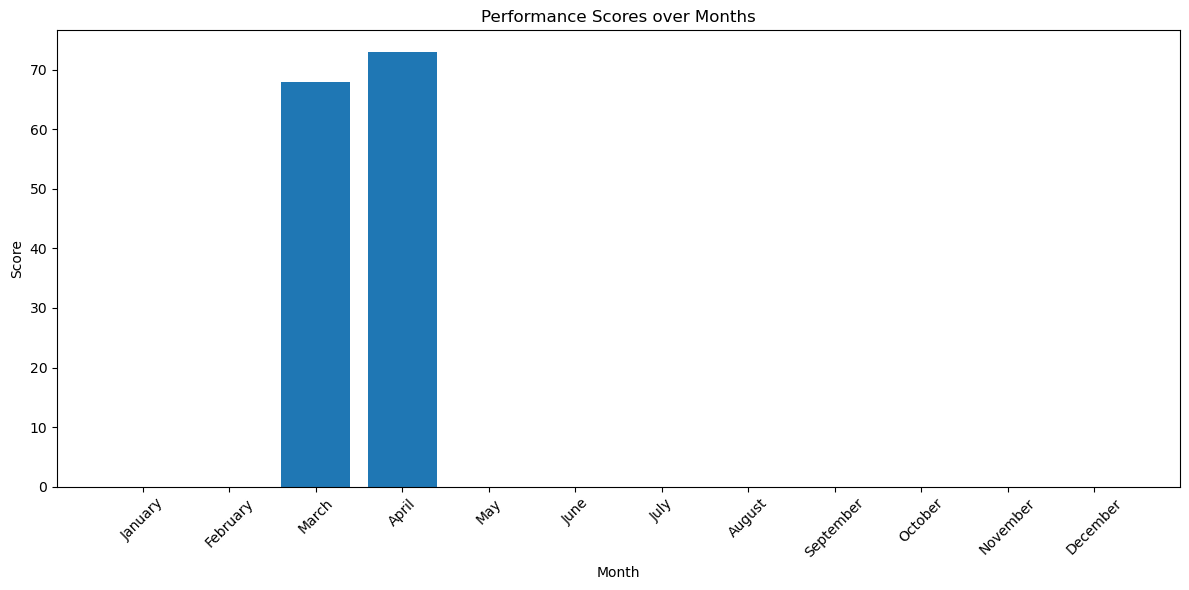

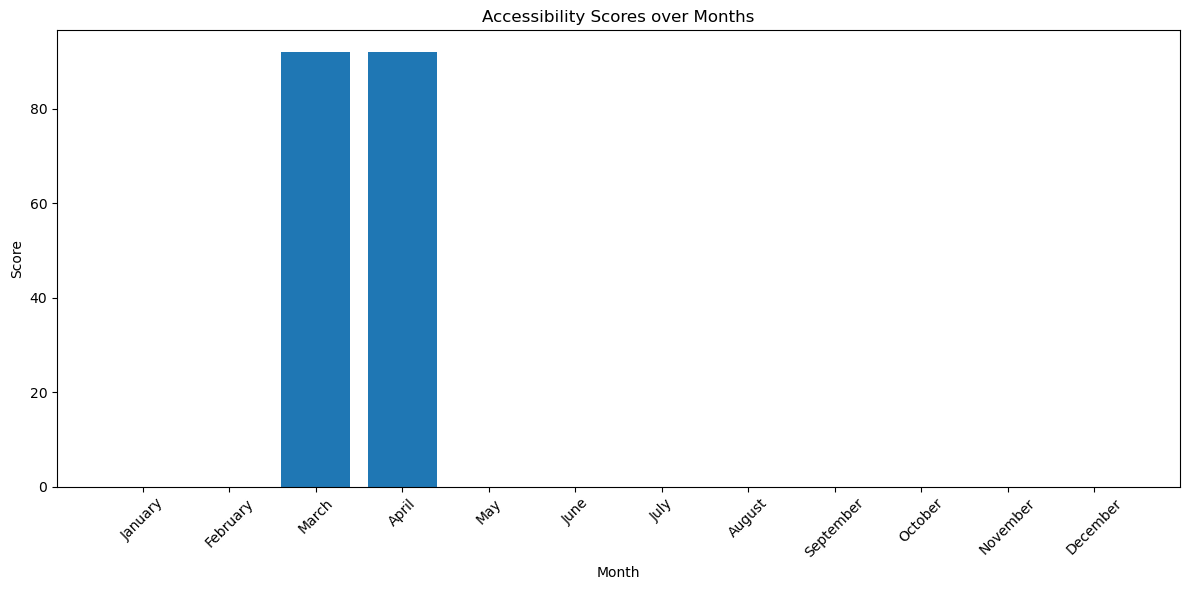

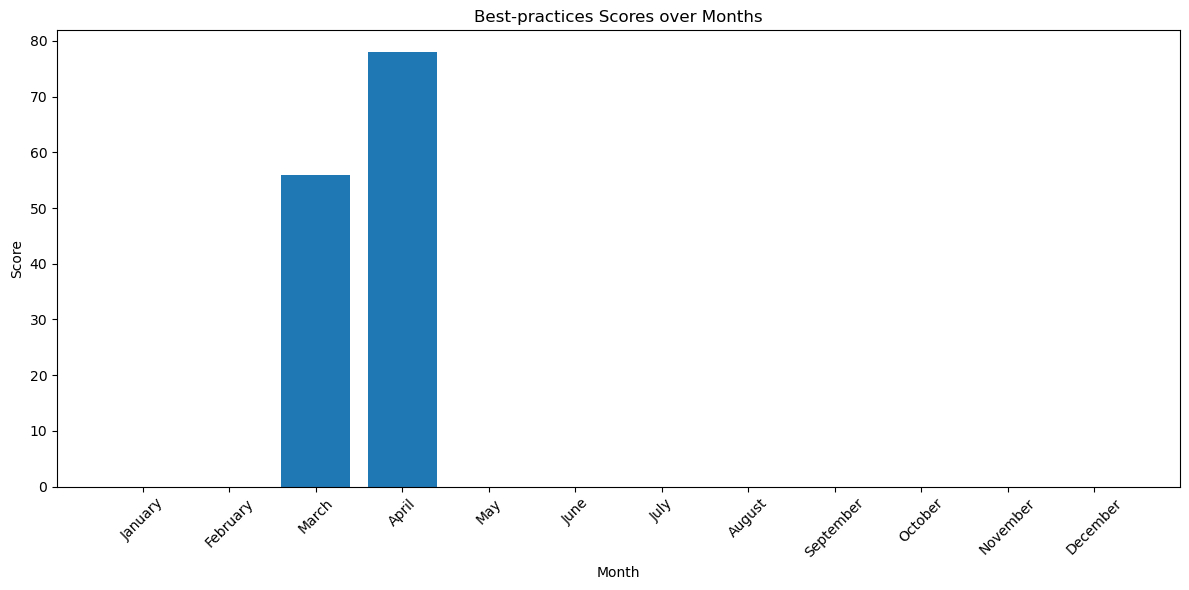

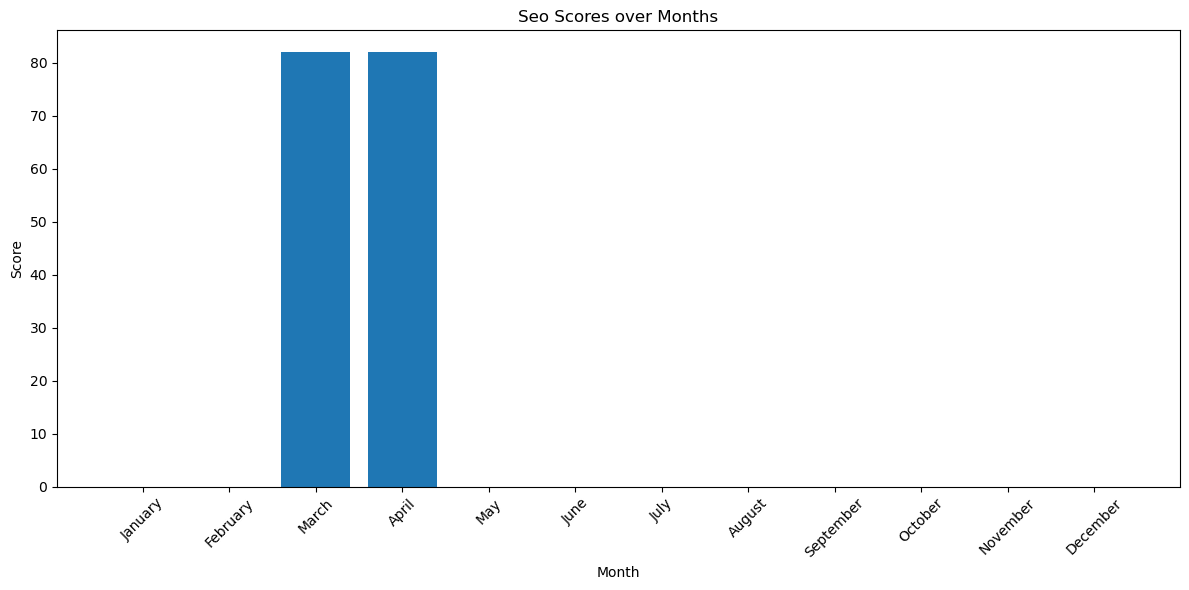

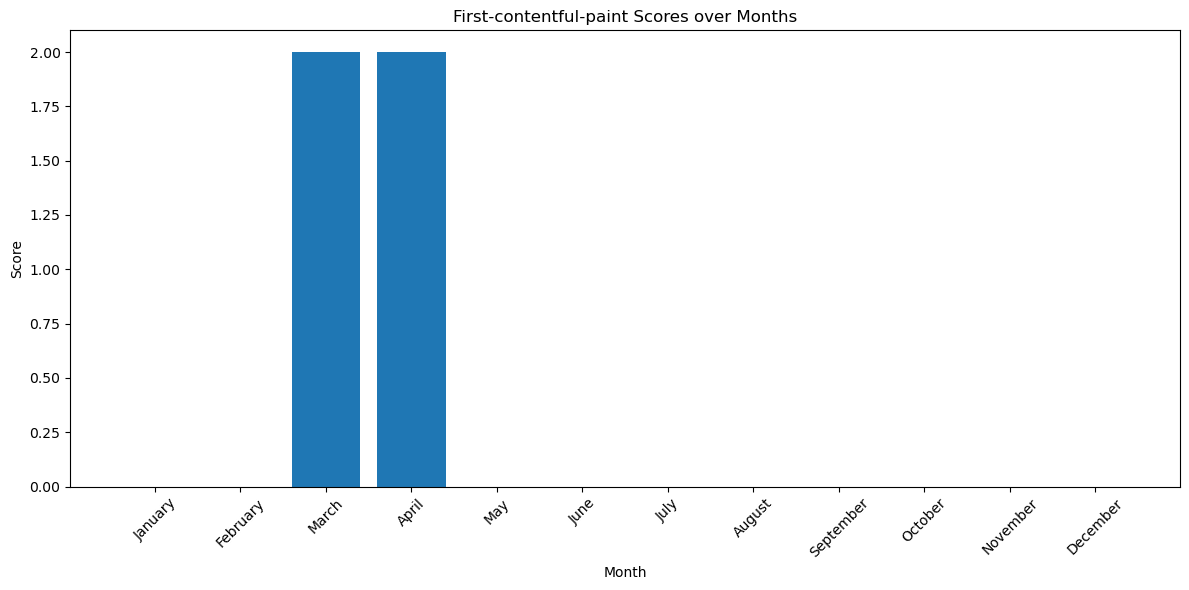

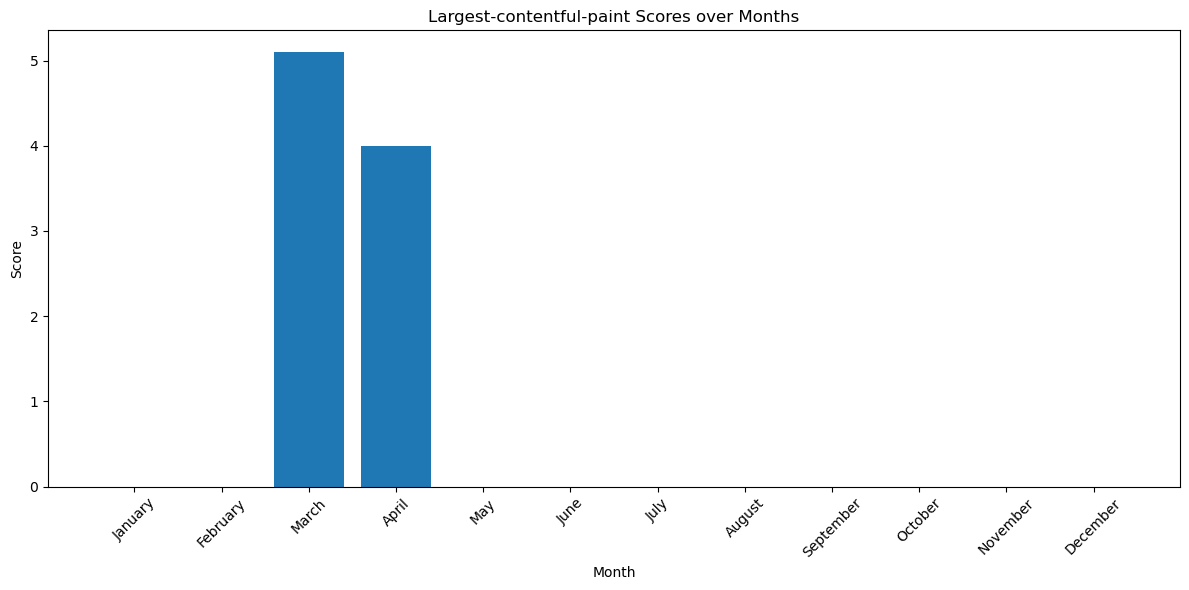

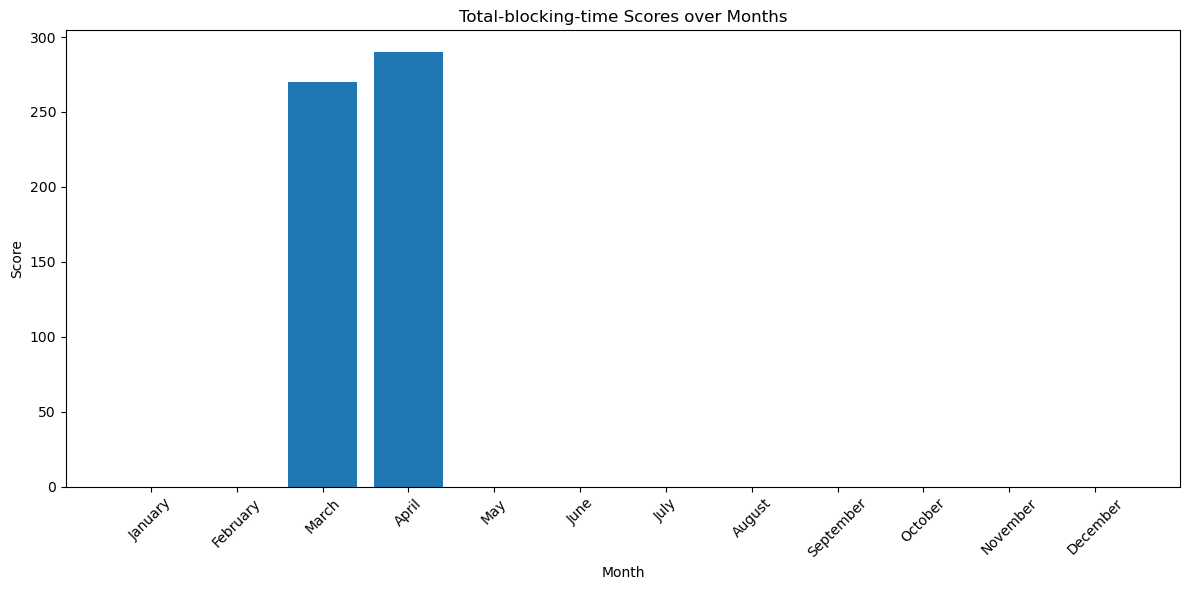

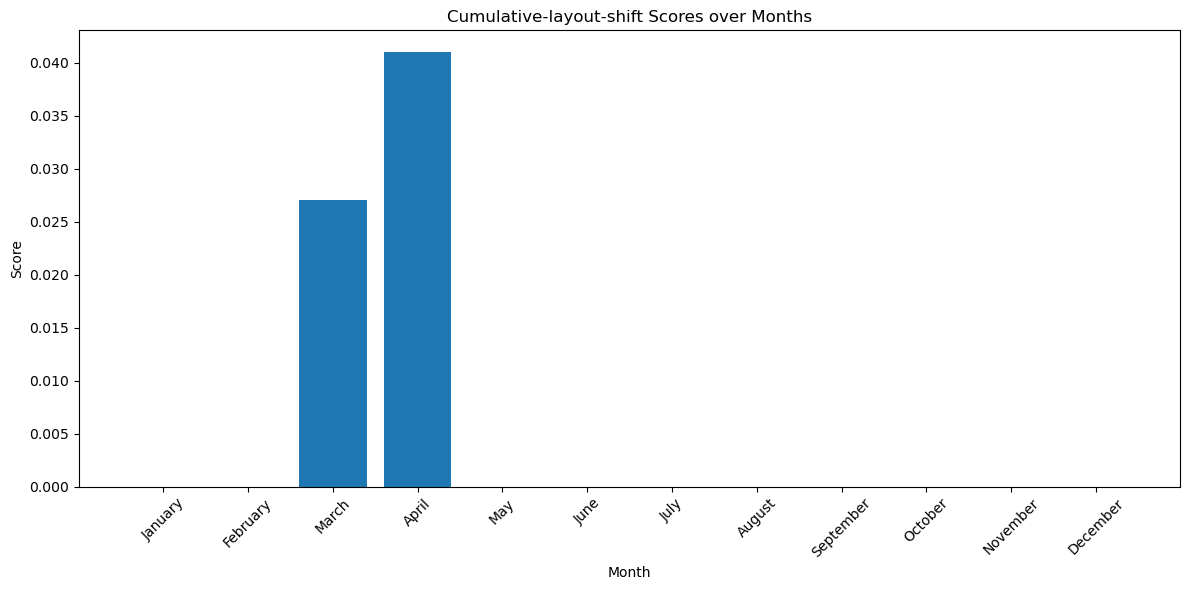

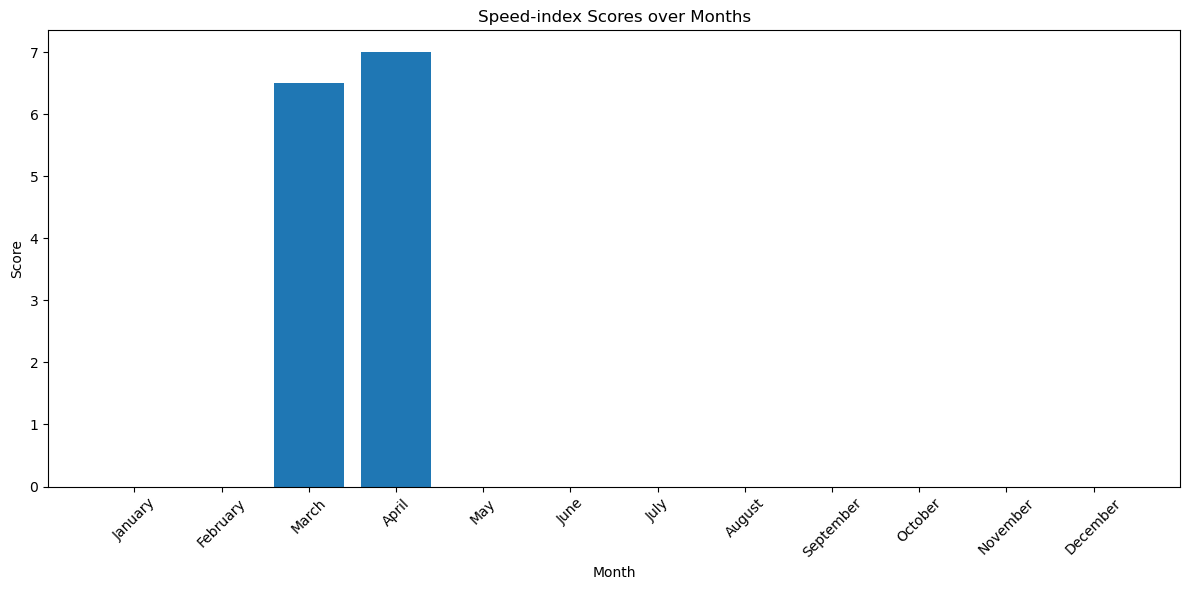

In [3]:
dataframe = pd.read_csv('mobile_report.csv')
all_months = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

# Create a DataFrame with all months
all_months_df = pd.DataFrame({'Month': all_months})# Merge with the original DataFrame
dataframe = pd.merge(all_months_df, dataframe, on='Month', how='left')

# Set the 'Month' column as the index
dataframe = dataframe.set_index('Month')

# Convert DataFrame to numeric type (to handle strings like ',' and '')
dataframe = dataframe.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0
dataframe.fillna(0, inplace=True)

# Define categories
categories = ['performance', 'accessibility', 'best-practices', 'seo', 
              'first-contentful-paint', 'largest-contentful-paint', 
              'total-blocking-time', 'cumulative-layout-shift', 'speed-index']

# Plot each category as a separate bar chart
for category in categories:
    plt.figure(figsize=(12, 6))
    plt.bar(dataframe.index, dataframe[category])
    plt.xlabel('Month')
    plt.ylabel('Score')
    plt.title(f'{category.capitalize()} Scores over Months')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()